In [ ]:
!pip install ggplot
!pip install pandas
!pip install factoextra
!pip install factoMineR
!pip install caret
!pip install scikit-learn
!pip install skimpy
!pip install tidyr
!pip install scikit-learn
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement factoextra (from versions: none)
ERROR: No matching distribution found for factoextra
ERROR: Could not find a version that satisfies the requirement factoMineR (from versions: none)
ERROR: No matching distribution found for factoMineR
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB

ERROR: Could not find a version that satisfies the requirement tidyr (from versions: none)
ERROR: No matching distribution found for tidyr


<ipython-input-3-32088dbd3285>:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristics = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
<ipython-input-3-32088dbd3285>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places = pd.read_csv('places.csv', encoding='ISO-8859-1')


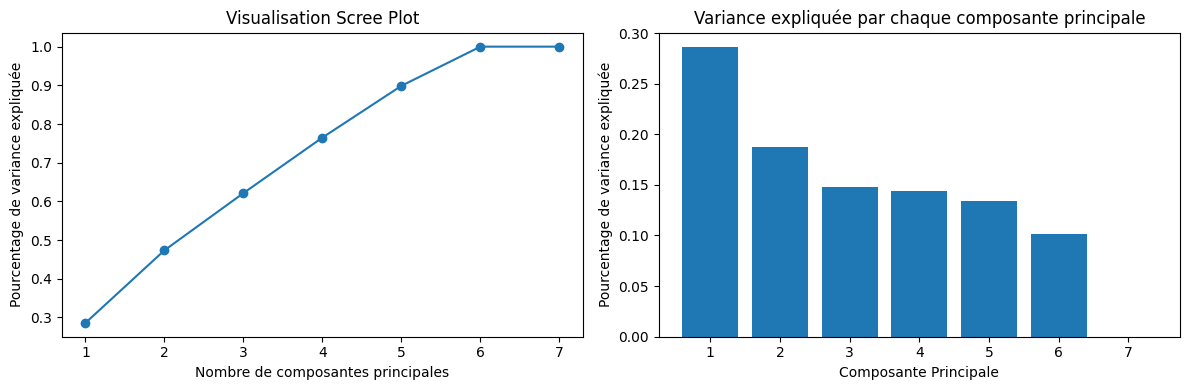

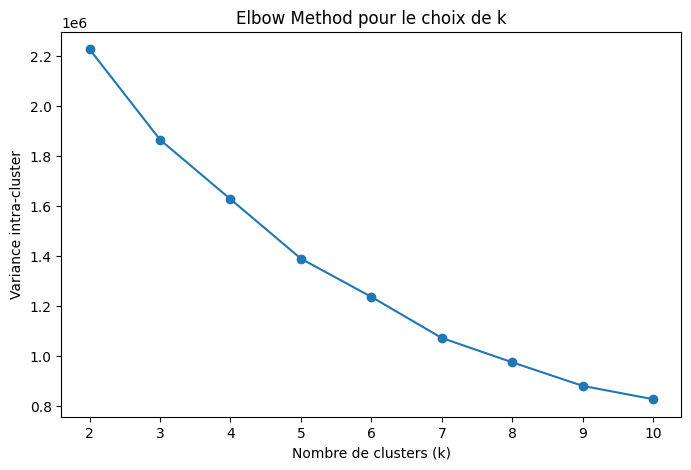

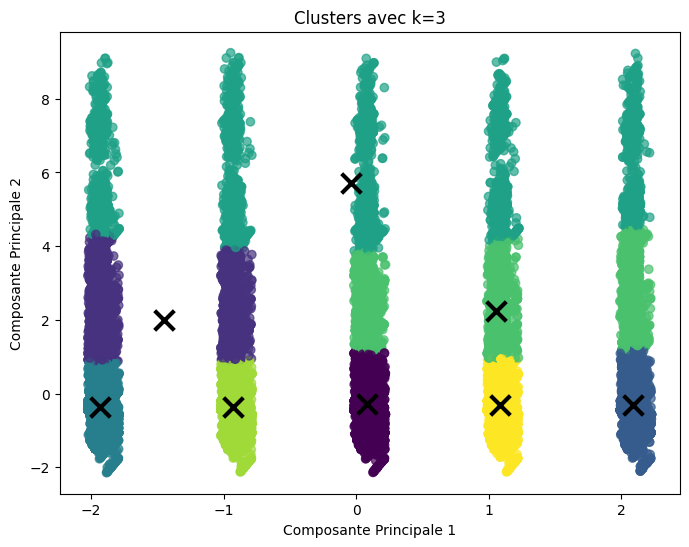

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger les données
caracteristics = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
places = pd.read_csv('places.csv', encoding='ISO-8859-1')

# Sélectionner les colonnes pertinentes
ca_v1 = caracteristics[["Num_Acc", "an", "lum", "dep", "atm"]]
li_v1 = places[["Num_Acc", "catr", "surf"]]


ca_v1 = ca_v1[ca_v1["an"] <= 5]

# Fusionner les DataFrames
db = pd.merge(ca_v1, li_v1, on="Num_Acc")

# Vérifier si la colonne 'Unnamed: 0' existe avant de la supprimer
if 'Unnamed: 0' in db.columns:
    db.drop(columns=["Unnamed: 0"], inplace=True)

# Supprimer les lignes où surf == 0
df = db[db["surf"] != '0']

# Réaliser l'analyse en composantes principales (PCA)
data_ohe = pd.get_dummies(df, drop_first=True)
data_ohe = data_ohe.dropna()

# Standardiser les données
scaler = StandardScaler()
data_ohe_scaled = scaler.fit_transform(data_ohe)

# Appliquer l'ACP
pca = PCA()
res_acp = pca.fit_transform(data_ohe_scaled)

# Scree Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Pourcentage de variance expliquée')
plt.title('Visualisation Scree Plot')

# Visualisation des composantes principales
plt.subplot(1, 2, 2)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composante Principale')
plt.ylabel('Pourcentage de variance expliquée')
plt.title('Variance expliquée par chaque composante principale')
plt.tight_layout()
plt.show()

# Clustering avec k-means
max_k = 10
res_variance = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=0)
    kmeans.fit(data_ohe_scaled)
    res_variance.append(kmeans.inertia_)

# Tracer le graphique de variance pour différents k
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_k + 1), res_variance, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Variance intra-cluster')
plt.title('Elbow Method pour le choix de k')
plt.show()

# Clustering avec k = 3
kmeans_3 = KMeans(n_clusters=3, n_init=100, random_state=0)
cluster_3 = kmeans_3.fit_predict(res_acp[:, :2])

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(res_acp[:, 0], res_acp[:, 1], c=cluster_3, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.title('Clusters avec k=3')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


<ipython-input-32-14c89fd30131>:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristics = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
<ipython-input-32-14c89fd30131>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places = pd.read_csv('places.csv', encoding='ISO-8859-1')


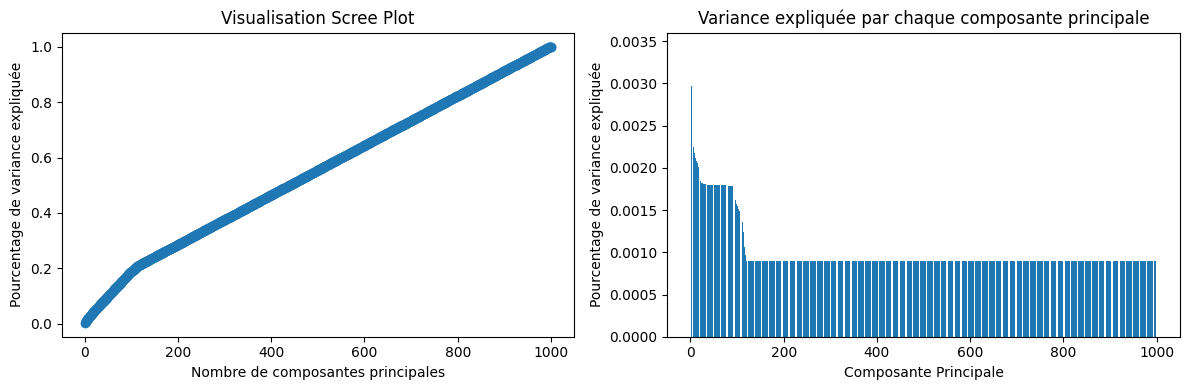

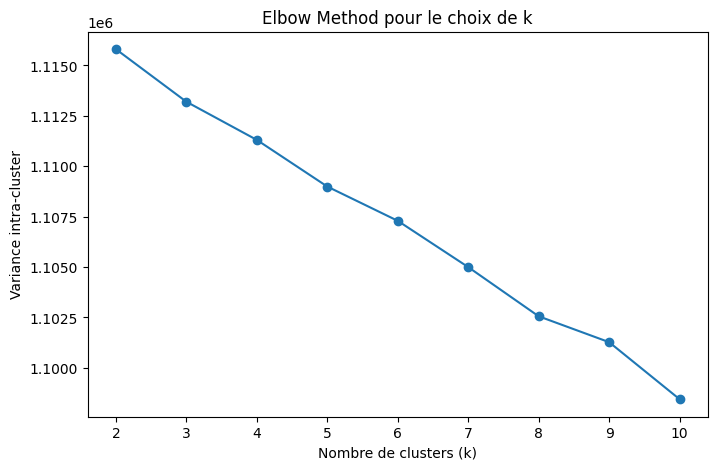

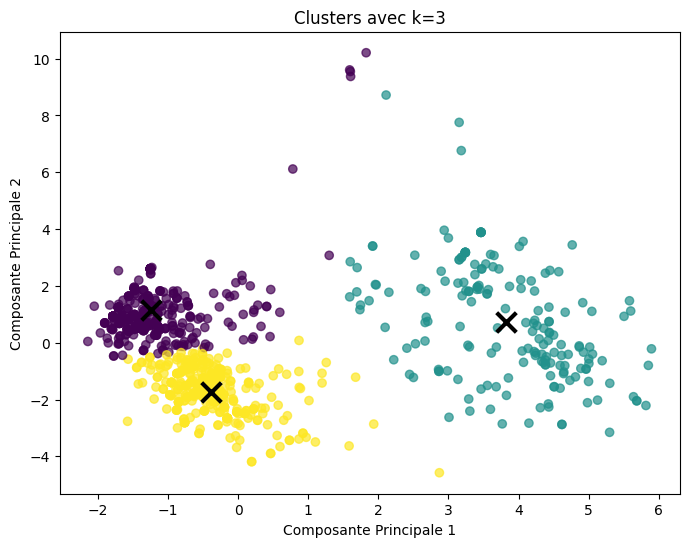

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger les données
caracteristics = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
places = pd.read_csv('places.csv', encoding='ISO-8859-1')

# Sélectionner les colonnes pertinentes
ca_v1 = caracteristics[["Num_Acc", "an", "lum", "dep", "atm"]]
li_v1 = places[["Num_Acc", "catr", "surf"]]

# Filtrer selon la condition an == 9
ca_v1 = ca_v1[ca_v1["an"] == 5]

# Fusionner les DataFrames
db = pd.merge(ca_v1, li_v1, on="Num_Acc")

# Vérifier si la colonne 'Unnamed: 0' existe avant de la supprimer
if 'Unnamed: 0' in db.columns:
    db.drop(columns=["Unnamed: 0"], inplace=True)

# Convertir toutes les colonnes en facteurs
db = db.apply(pd.to_numeric, errors="ignore")
db = db.astype(str)

# Supprimer les lignes où surf == 0
df = db[db["surf"] != '0']

# Échantillonner aléatoirement 1000 lignes
df_sample = df.sample(n=1000, random_state=42)

# Réaliser l'analyse en composantes principales (PCA)
data_ohe = pd.get_dummies(df_sample, drop_first=True)
data_ohe = data_ohe.dropna()

# Standardiser les données
scaler = StandardScaler()
data_ohe_scaled = scaler.fit_transform(data_ohe)

# Appliquer l'ACP
pca = PCA()
res_acp = pca.fit_transform(data_ohe_scaled)

# Scree Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Pourcentage de variance expliquée')
plt.title('Visualisation Scree Plot')

# Visualisation des composantes principales
plt.subplot(1, 2, 2)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composante Principale')
plt.ylabel('Pourcentage de variance expliquée')
plt.title('Variance expliquée par chaque composante principale')
plt.tight_layout()
plt.show()

# Clustering avec k-means
max_k = 10
res_variance = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=0)
    kmeans.fit(data_ohe_scaled)
    res_variance.append(kmeans.inertia_)

# Tracer le graphique de variance pour différents k
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_k + 1), res_variance, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Variance intra-cluster')
plt.title('Elbow Method pour le choix de k')
plt.show()

# Clustering avec k = 3
kmeans_3 = KMeans(n_clusters=3, n_init=100, random_state=0)
cluster_3 = kmeans_3.fit_predict(res_acp[:, :2])

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(res_acp[:, 0], res_acp[:, 1], c=cluster_3, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.title('Clusters avec k=3')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Charger les données
# Assurez-vous d'ajuster le chemin du fichier CSV en fonction de votre emplacement
caracteristics = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
places = pd.read_csv('places.csv', encoding='ISO-8859-1')
users = pd.read_csv('users.csv', encoding='ISO-8859-1')
vehicles = pd.read_csv('vehicles.csv', encoding='ISO-8859-1')

# Fusionner les données pertinentes
data = pd.merge(caracteristics[['Num_Acc', 'lum', 'atm', 'col']], places[['Num_Acc', 'catr', 'circ', 'surf']], on='Num_Acc')

# Convertir les colonnes en facteur
for col in ['lum', 'atm', 'col', 'catr', 'circ', 'surf']:
    data[col] = pd.Categorical(data[col])

# Supprimer les valeurs manquantes
data = data.dropna()

# One-hot encode des variables catégorielles
data_ohe = pd.get_dummies(data, drop_first=True)

# Appliquer l'ACP
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_ohe)

# Appliquer K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_ohe)

# Visualiser les résultats de K-means dans l'espace PCA
data_plot = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_plot['Cluster'] = clusters

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_plot, palette='viridis', alpha=0.7)
plt.title('Visualisation des Clusters K-means dans l\'espace PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


ModuleNotFoundError: No module named 'factoextra'

<ipython-input-6-32dfd622990c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PC1', data=data_plot, palette='viridis')


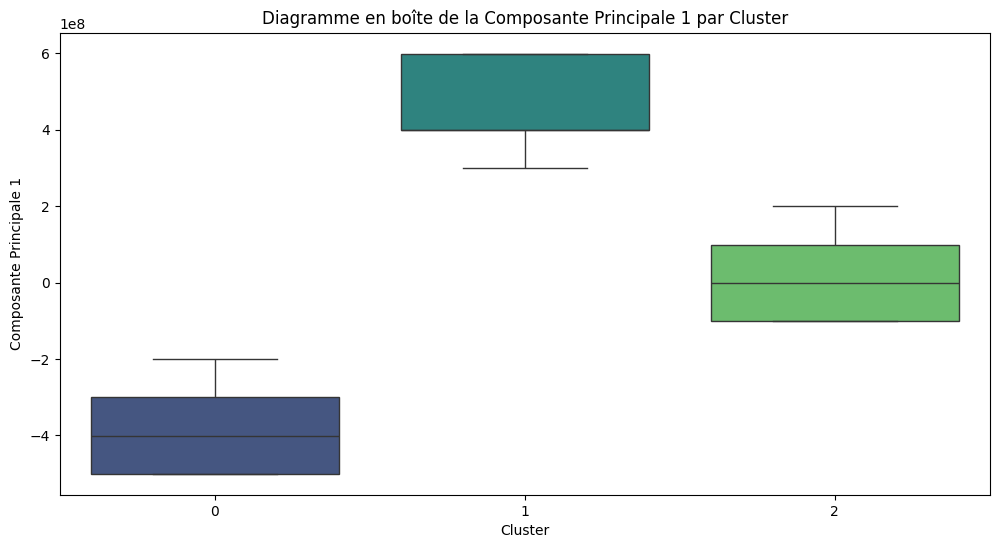

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='PC1', data=data_plot, palette='viridis')
plt.title('Diagramme en boîte de la Composante Principale 1 par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Composante Principale 1')
plt.show()

<ipython-input-7-fac2b3a97124>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristics = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
<ipython-input-7-fac2b3a97124>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places = pd.read_csv('places.csv', encoding='ISO-8859-1')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre d'accidents dans chaque cluster:
0    330635
1    235730
2    272417
Name: Cluster, dtype: int64


<ipython-input-7-fac2b3a97124>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data_plot, palette='viridis')


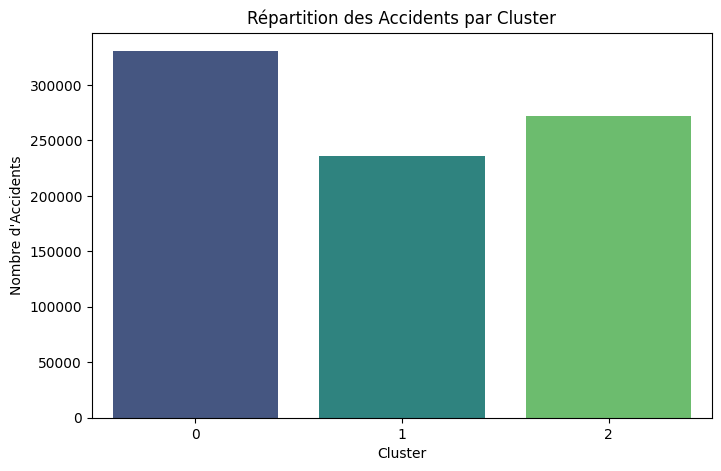

In [ ]:
caracteristics = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
places = pd.read_csv('places.csv', encoding='ISO-8859-1')
users = pd.read_csv('users.csv', encoding='ISO-8859-1')
vehicles = pd.read_csv('vehicles.csv', encoding='ISO-8859-1')

# Fusionner les données pertinentes
data = pd.merge(caracteristics[['Num_Acc', 'lum', 'atm', 'col']], places[['Num_Acc', 'catr', 'circ', 'surf']], on='Num_Acc')

# Convertir les colonnes en facteur
for col in ['lum', 'atm', 'col', 'catr', 'circ', 'surf']:
    data[col] = pd.Categorical(data[col])

# Supprimer les valeurs manquantes
data = data.dropna()

# One-hot encode des variables catégorielles
data_ohe = pd.get_dummies(data, drop_first=True)

# Appliquer l'ACP
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_ohe)

# Appliquer K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_ohe)

# Visualiser les résultats de K-means dans l'espace PCA
data_plot = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_plot['Cluster'] = clusters

# Compter le nombre d'accidents dans chaque cluster
cluster_counts = data_plot['Cluster'].value_counts().sort_index()

# Afficher les résultats en chiffres
print("Nombre d'accidents dans chaque cluster:")
print(cluster_counts)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data_plot, palette='viridis')
plt.title('Répartition des Accidents par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'Accidents')
plt.show()

<ipython-input-13-d9f45a99db89>:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  ca = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
<ipython-input-13-d9f45a99db89>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  li = pd.read_csv('places.csv', encoding='ISO-8859-1')


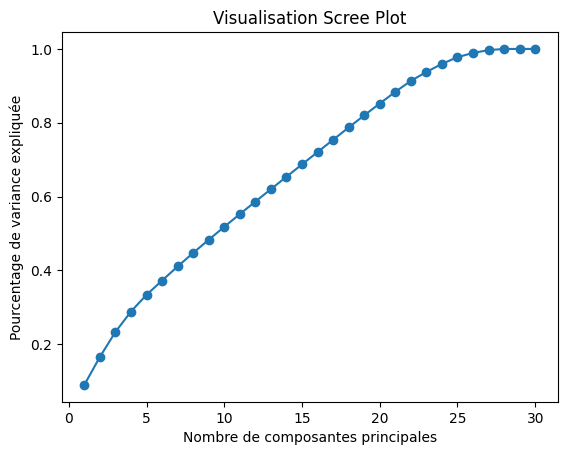

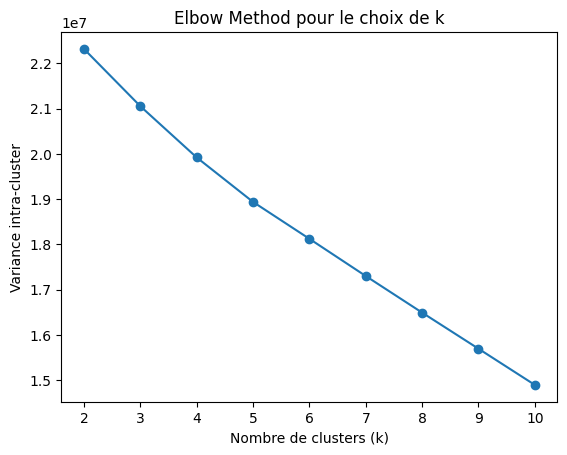

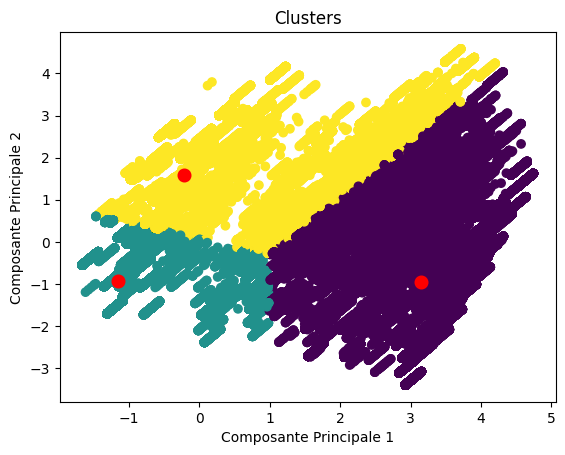

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger les données
ca = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
li = pd.read_csv('places.csv', encoding='ISO-8859-1')

# Sélectionner les colonnes pertinentes
ca_v1 = ca[["Num_Acc", "an", "lum", "agg", "atm"]]
li_v1 = li[["Num_Acc", "catr", "surf"]]

# Fusionner les DataFrames
db = pd.merge(ca_v1, li_v1, on="Num_Acc")

# Convertir les colonnes en facteurs
for col in ["lum", "atm", "catr", "agg", "surf"]:
    db[col] = pd.Categorical(db[col])

# Supprimer les lignes où surf == 0
df = db[db["surf"] != 0]

# Échantillonner aléatoirement 1000 lignes
df_sample = df
# Réaliser l'analyse en composantes principales (PCA)
data_ohe = pd.get_dummies(df_sample, drop_first=True)
data_ohe = data_ohe.dropna()

# Standardiser les données
scaler = StandardScaler()
data_ohe_scaled = scaler.fit_transform(data_ohe)

# Appliquer l'ACP
pca = PCA()
res_acp = pca.fit_transform(data_ohe_scaled)

# Scree Plot
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Pourcentage de variance expliquée')
plt.title('Visualisation Scree Plot')
plt.show()

# Clustering avec k-means
max_k = 10
res_variance = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=0)
    kmeans.fit(data_ohe_scaled)
    res_variance.append(kmeans.inertia_)

# Tracer le graphique de variance pour différents k
k_and_variance = pd.DataFrame({"k": range(2, max_k + 1), "variance": res_variance})
plt.plot(k_and_variance["k"], k_and_variance["variance"], marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Variance intra-cluster')
plt.title('Elbow Method pour le choix de k')
plt.show()

# Clustering avec k = 3
kmeans_3 = KMeans(n_clusters=3, n_init=100, random_state=0)
cluster_3 = kmeans_3.fit_predict(res_acp[:, :2])

# Visualisation des clusters
data_plot = pd.DataFrame({'Dim.1': res_acp[:, 0], 'Dim.2': res_acp[:, 1], 'Cluster': cluster_3})
plt.scatter(data_plot['Dim.1'], data_plot['Dim.2'], c=data_plot['Cluster'], cmap='viridis')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], marker='.', s=200, linewidths=3, color='red')
plt.title('Clusters')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()
